## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
import matplotlib
print(matplotlib.__version__)

3.8.4


## Import the Dataset

In [3]:
import_path = r"C:\Users\tjsra\OneDrive\Desktop\CF data analyst\Achievement 6\02 Data\prepared data\Conditions_Contributing_to_COVID-19_Deaths_Cleaned.csv"

In [4]:
df = pd.read_csv(import_path)

In [5]:
df.head()

,Data As Of,Start Date,End Date,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,2023-09-24,2020-01-01,2020-01-31,2020.0,1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
1,2023-09-24,2020-02-01,2020-02-29,2020.0,2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
2,2023-09-24,2020-03-01,2020-03-31,2020.0,3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
3,2023-09-24,2020-04-01,2020-04-30,2020.0,4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN
4,2023-09-24,2020-05-01,2020-05-31,2020.0,5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0.0,0.0,NaN


In [6]:
df.shape

(430560, 13)

In [7]:
df.dtypes

Data As Of             object
Start Date             object
End Date               object
Year                  float64
Month                 float64
State                  object
Condition Group        object
Condition              object
ICD10_codes            object
Age Group              object
COVID-19 Deaths       float64
Number of Mentions    float64
Flag                   object
dtype: object

## Exploring Relationship

### Correlations

### Create a correlation matrix using pandas

###  To change the data types of condtion group, condition and Age group to create a correlation Matrix.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [9]:
label_encoder = LabelEncoder()
df['Age Group Encoded'] = label_encoder.fit_transform(df['Age Group'])
df['Condition Group Encoded'] = label_encoder.fit_transform(df['Condition Group'])
df['Condition Encoded'] = label_encoder.fit_transform(df['Condition'])


In [10]:
numerical_columns = df.select_dtypes(include=['int', 'float'])
numerical_columns = numerical_columns[['Year', 'Month', 'COVID-19 Deaths', 'Number of Mentions', 'Age Group Encoded', 'Condition Group Encoded', 'Condition Encoded']]

In [11]:
corr_matrix = numerical_columns.corr()

In [12]:
print(corr_matrix)

                                 Year         Month  COVID-19 Deaths  \
Year                     1.000000e+00 -1.322529e-01        -0.069730   
Month                   -1.322529e-01  1.000000e+00         0.008067   
COVID-19 Deaths         -6.972994e-02  8.066742e-03         1.000000   
Number of Mentions      -6.924107e-02  7.957972e-03         0.989012   
Age Group Encoded       -2.103677e-14 -1.506794e-17         0.157696   
Condition Group Encoded  2.204744e-13  2.073373e-16        -0.048364   
Condition Encoded        7.042147e-14  1.997066e-17        -0.063370   

                         Number of Mentions  Age Group Encoded  \
Year                              -0.069241      -2.103677e-14   
Month                              0.007958      -1.506794e-17   
COVID-19 Deaths                    0.989012       1.576959e-01   
Number of Mentions                 1.000000       1.617010e-01   
Age Group Encoded                  0.161701       1.000000e+00   
Condition Group Encoded    

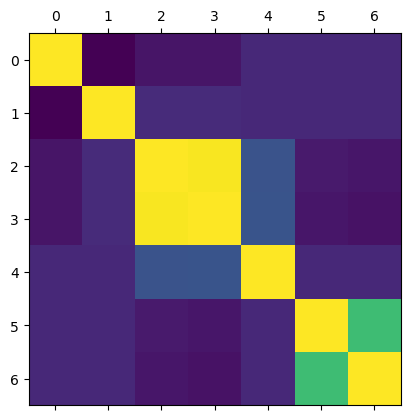

In [13]:
plt.matshow(numerical_columns.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

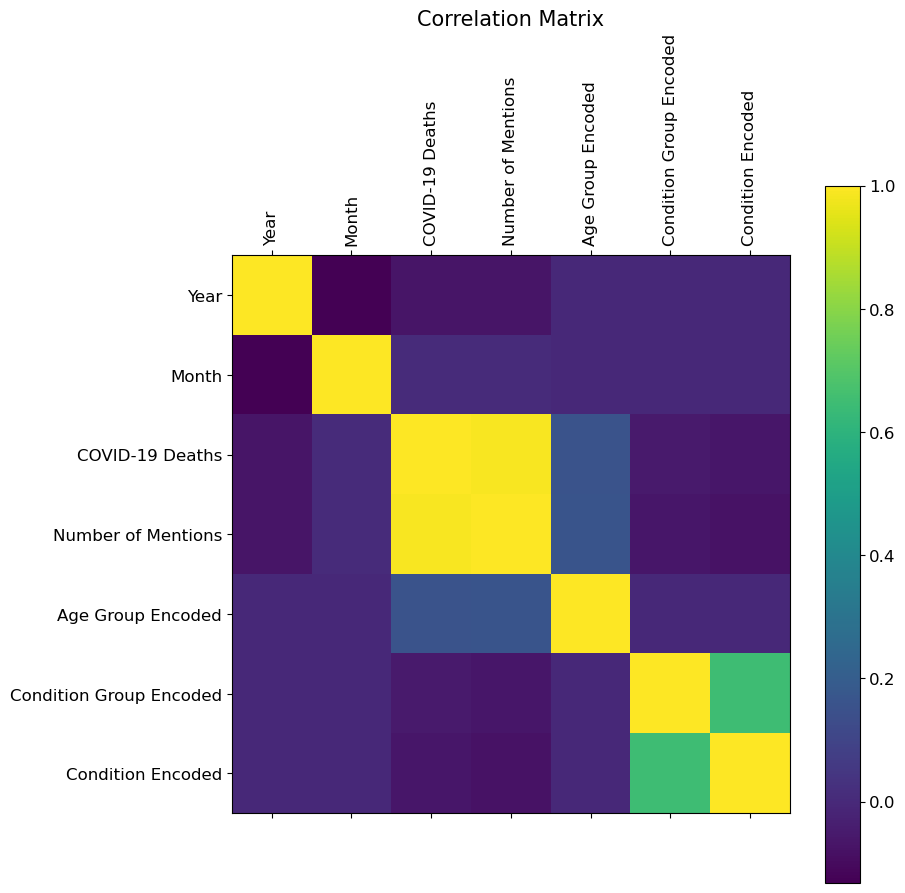

In [14]:
   #Next, we add a legend, column labels, change the size of the heatmap and add a title
f=plt.figure(figsize=(9,9)) #This establishes the size of the heatmap
plt.matshow(numerical_columns.corr(), fignum=f.number) #Defines the type of plot
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=90)
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12) #No need for rotation in y-axis
cb=plt.colorbar() #add a color legend (optimizes itseld based on colors used in heatmap)
cb.ax.tick_params(labelsize=12) #add font size
plt.title('Correlation Matrix', fontsize=15) #Creates titles

### As shown in the legend, the darker the color of the square, the stronger the negative relationship between those two variables. Conversely, the lighter the color in the square, the stronger the positive relationship between the two variables.

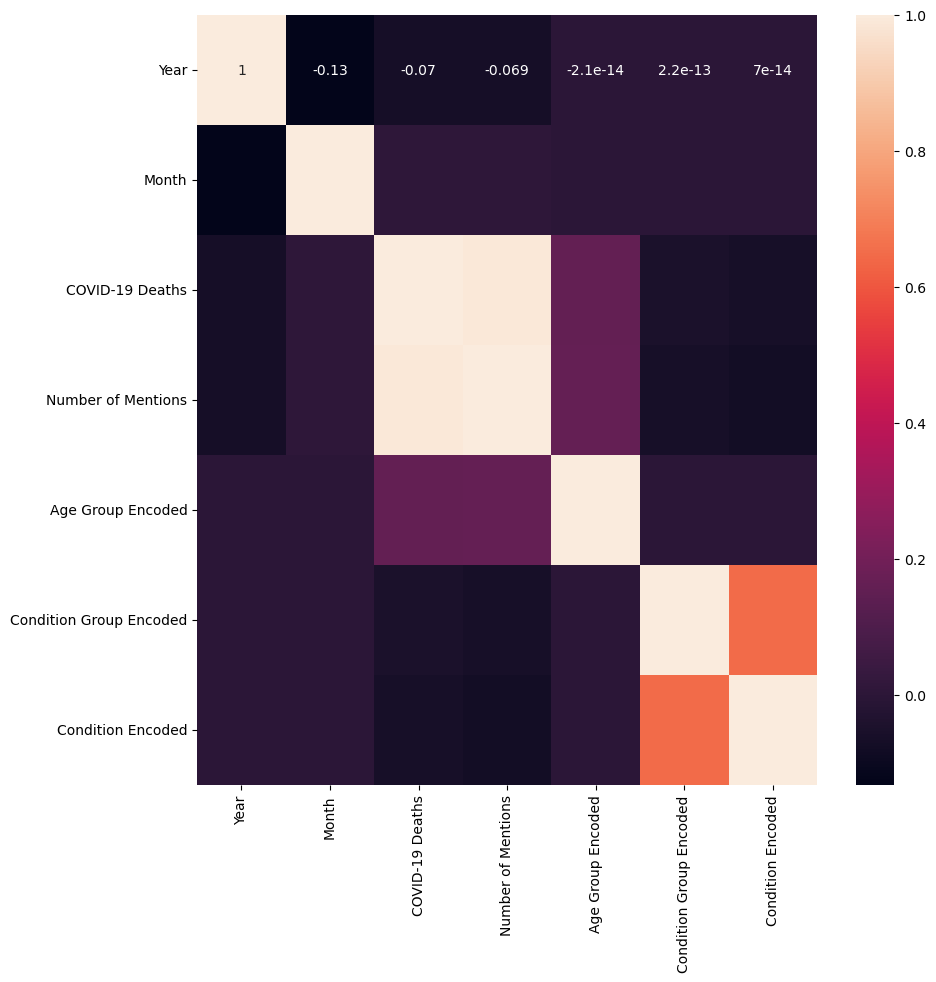

In [15]:
#Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(numerical_columns.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

### The same as above , the lighter the color, the stronger the (positive) relationship, and vice versa for the darker colors.

## Scatterplot

<Axes: xlabel='Age Group Encoded', ylabel='COVID-19 Deaths'>

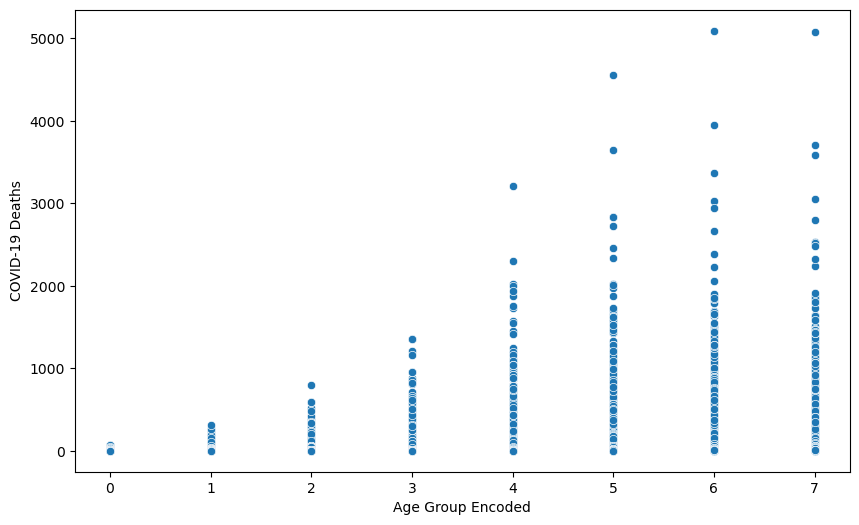

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age Group Encoded', y='COVID-19 Deaths')


### This scatterplot reveals that there is a high mortality rates in older Age Groups.

## Pair plot

In [17]:
selected_columns = df[['COVID-19 Deaths', 'Number of Mentions', 'Age Group Encoded', 'Condition Group Encoded', 'Condition Encoded']]


C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

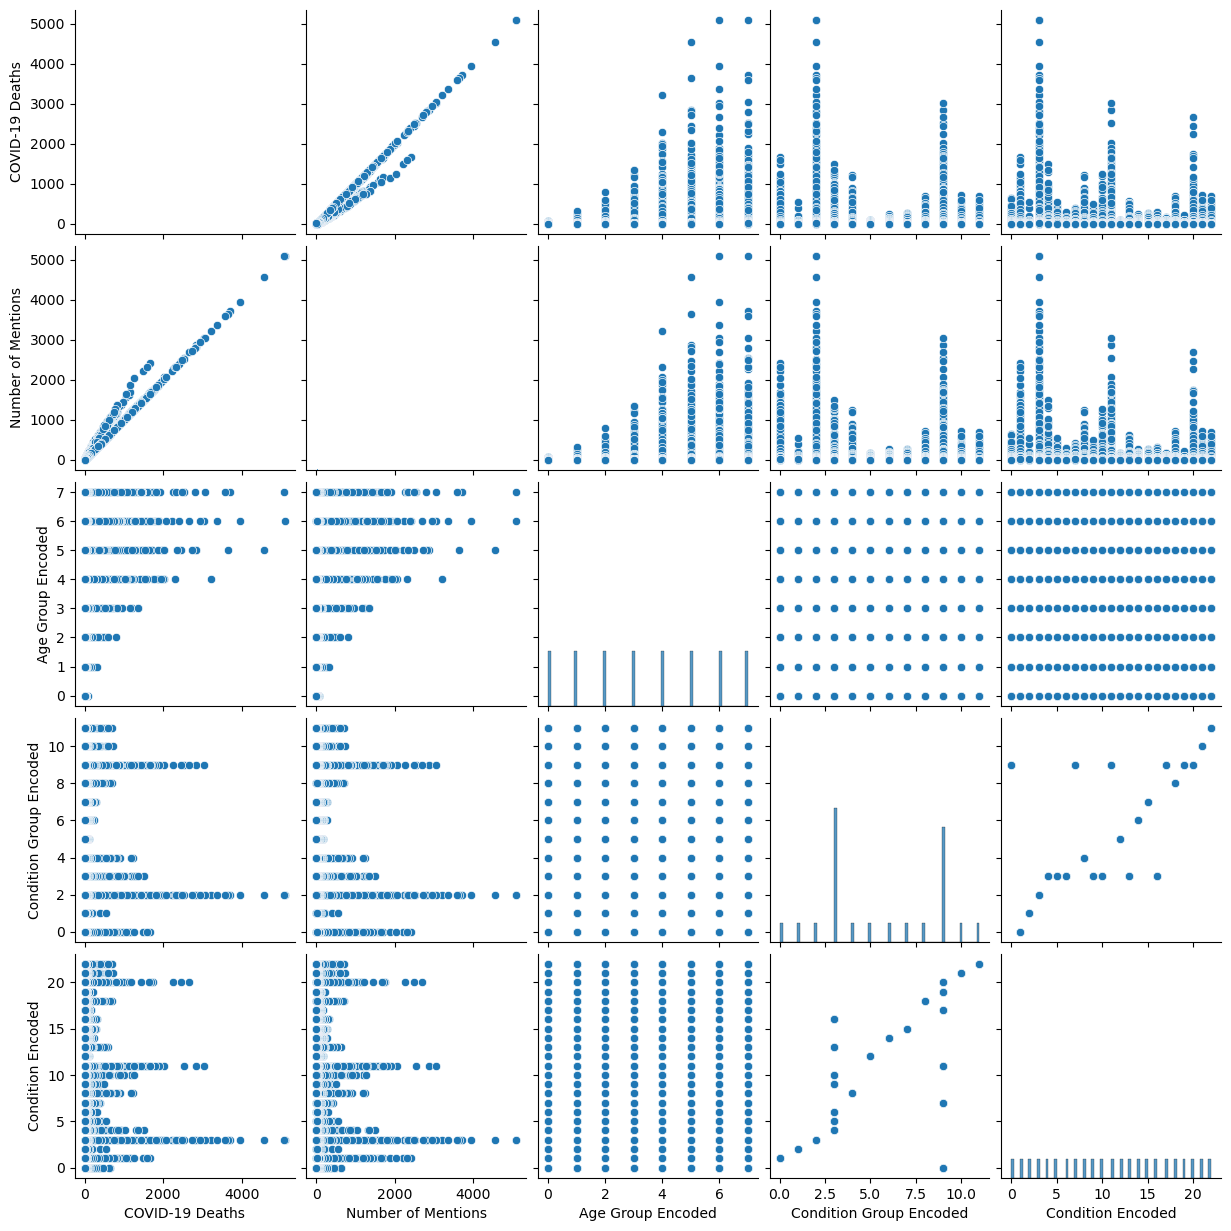

In [18]:
sns.pairplot(selected_columns)

### This analysis provides a comprehensive view of the relationships between the variables, indicating where further analysis might be necessary.

## Categorical plot

<Figure size 1200x800 with 0 Axes>

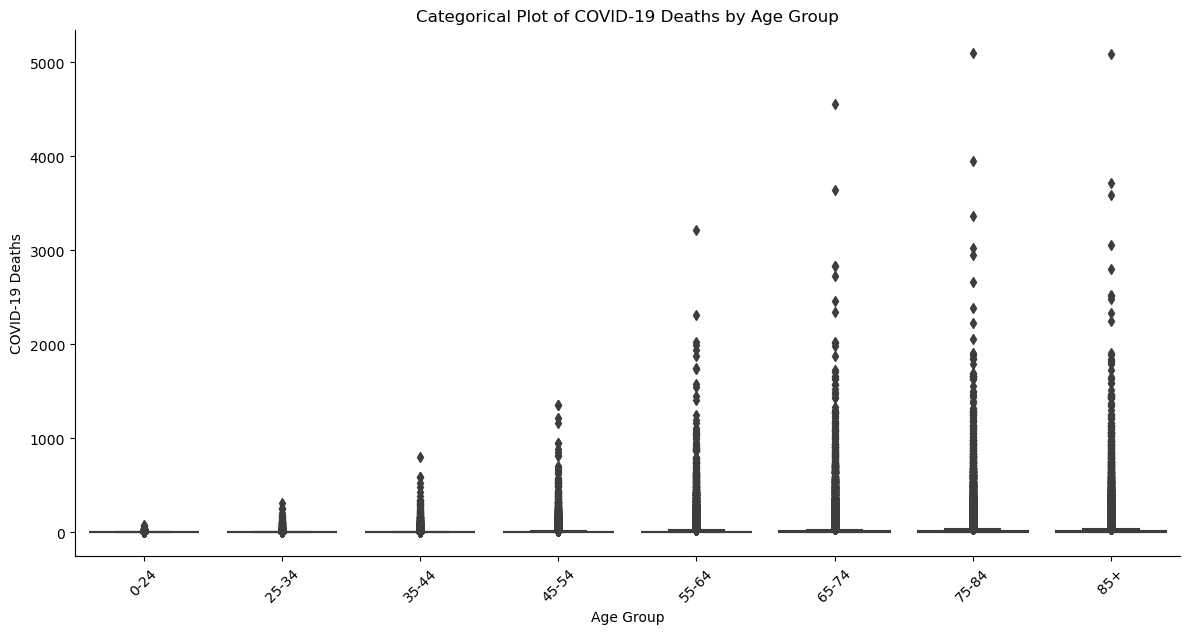

In [19]:
plt.figure(figsize=(12, 8))
sns.catplot(x='Age Group', y='COVID-19 Deaths', data=df, kind='box', height=6, aspect=2)
plt.title('Categorical Plot of COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

### The older age groups (65 and above) are more severely impacted by COVID-19.

C:\Users\tjsra\AppData\Local\Temp\ipykernel_17200\664473764.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Age Group', y='COVID-19 Deaths', data=df, jitter=True, palette='Set2', size=5)
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead o

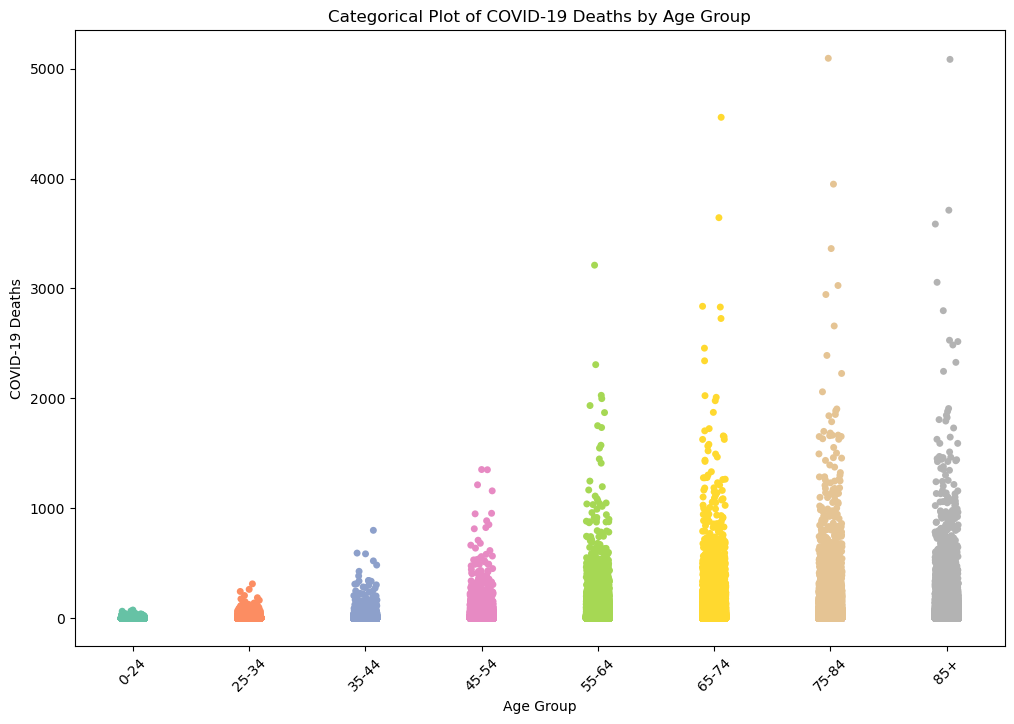

In [21]:
plt.figure(figsize=(12, 8))
sns.stripplot(x='Age Group', y='COVID-19 Deaths', data=df, jitter=True, palette='Set2', size=5)
plt.title('Categorical Plot of COVID-19 Deaths by Age Group')
plt.xlabel('Age Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.show()

C:\Users\tjsra\AppData\Local\Temp\ipykernel_17200\1597355542.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Condition', y='COVID-19 Deaths', data=df, jitter=True, palette='Set2', size=5)
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead 

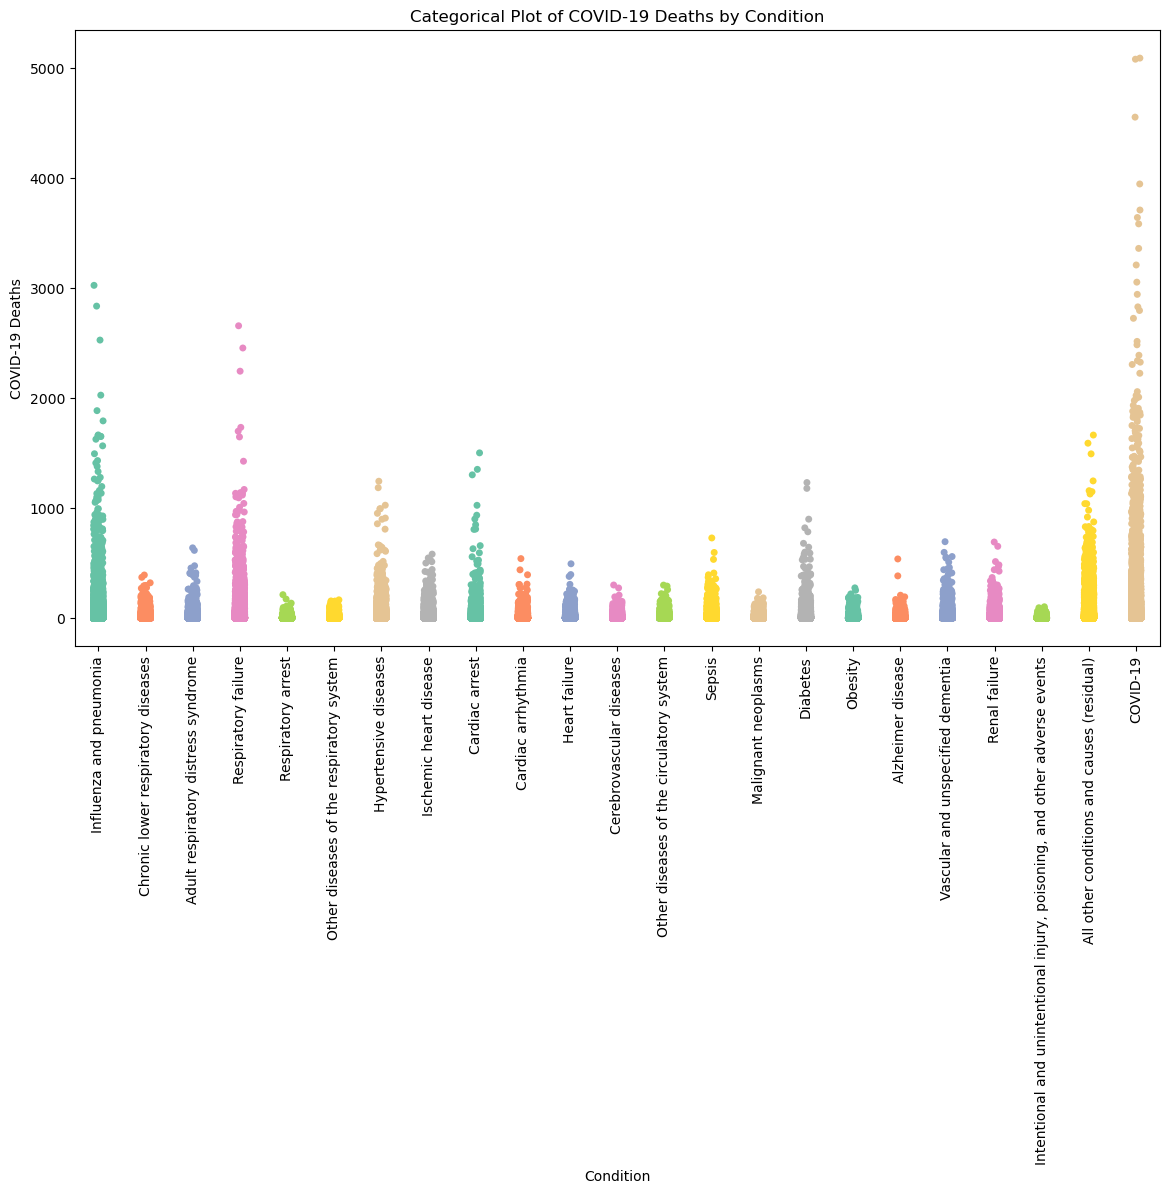

In [22]:
plt.figure(figsize=(14, 8))
sns.stripplot(x='Condition', y='COVID-19 Deaths', data=df, jitter=True, palette='Set2', size=5)
plt.title('Categorical Plot of COVID-19 Deaths by Condition')
plt.xlabel('Condition')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

### The COVID-19 deaths are associated with the 'COVID-19 condition.The condition such as Influenza and Pneumonia shows a significant number of deaths, highlighting the severe impact of respiratory diseases. And the chronic Lower Respiratory Diseases, indicating their impact on patients.

C:\Users\tjsra\AppData\Local\Temp\ipykernel_17200\328232607.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x='Condition Group', y='COVID-19 Deaths', data=df, jitter=True, palette='Set2', size=5)
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tjsra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` ins

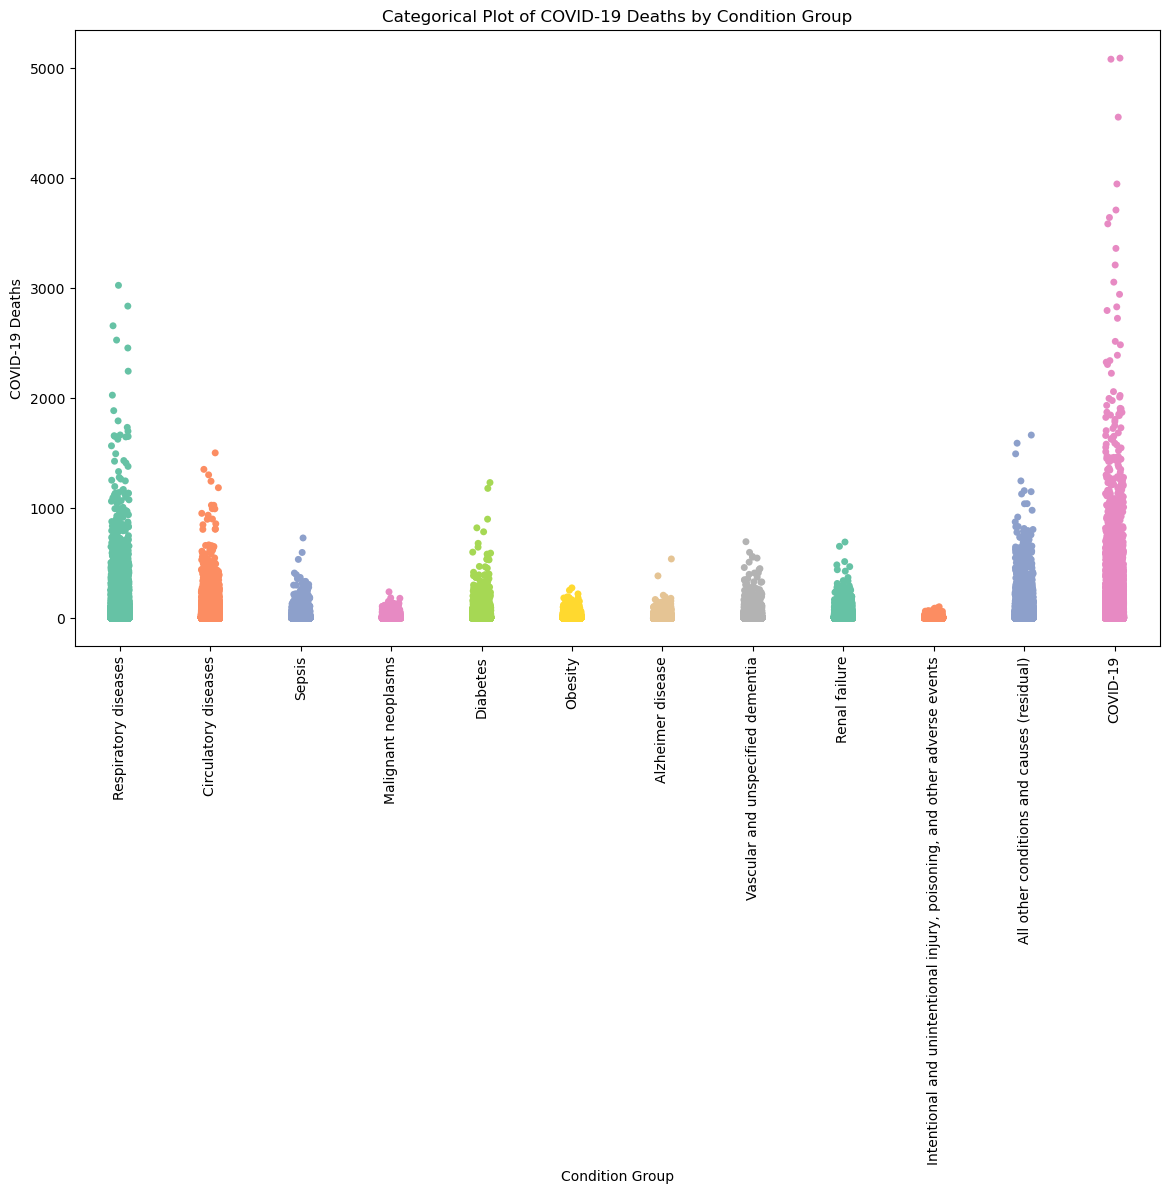

In [23]:
# Create a strip plot
plt.figure(figsize=(14, 8))
sns.stripplot(x='Condition Group', y='COVID-19 Deaths', data=df, jitter=True, palette='Set2', size=5)
plt.title('Categorical Plot of COVID-19 Deaths by Condition Group')
plt.xlabel('Condition Group')
plt.ylabel('COVID-19 Deaths')
plt.xticks(rotation=90)  # Rotate x labels for better readability
plt.show()

### COVID-19, Respiratory Diseases and Circulatory Diseases are high mortality condition group.Respiratory diseases like pneumonia, influenza, and chronic lower respiratory diseases are known to be severe, especially in the context of COVID-19 complications. Circulatory Diseases like heart disease and stroke, which are leading causes of death. 

In [24]:
age_condition_deaths = df.groupby(['Age Group', 'Condition'])['COVID-19 Deaths'].sum().reset_index()

In [25]:
# Find the most common conditions with the highest COVID-19 deaths in each Age Group
top_conditions_by_age_group = age_condition_deaths.sort_values(by=['Age Group', 'COVID-19 Deaths'], ascending=[True, False]).groupby('Age Group').head(3)


In [26]:
print(top_conditions_by_age_group)

    Age Group                                   Condition  COVID-19 Deaths
3        0-24                                    COVID-19           7090.0
1        0-24  All other conditions and causes (residual)           5207.0
11       0-24                     Influenza and pneumonia           3526.0
26      25-34                                    COVID-19          14699.0
34      25-34                     Influenza and pneumonia           8096.0
24      25-34  All other conditions and causes (residual)           8080.0
49      35-44                                    COVID-19          31761.0
57      35-44                     Influenza and pneumonia          17047.0
47      35-44  All other conditions and causes (residual)          14796.0
72      45-54                                    COVID-19          72166.0
80      45-54                     Influenza and pneumonia          39276.0
70      45-54  All other conditions and causes (residual)          30702.0
95      55-64            

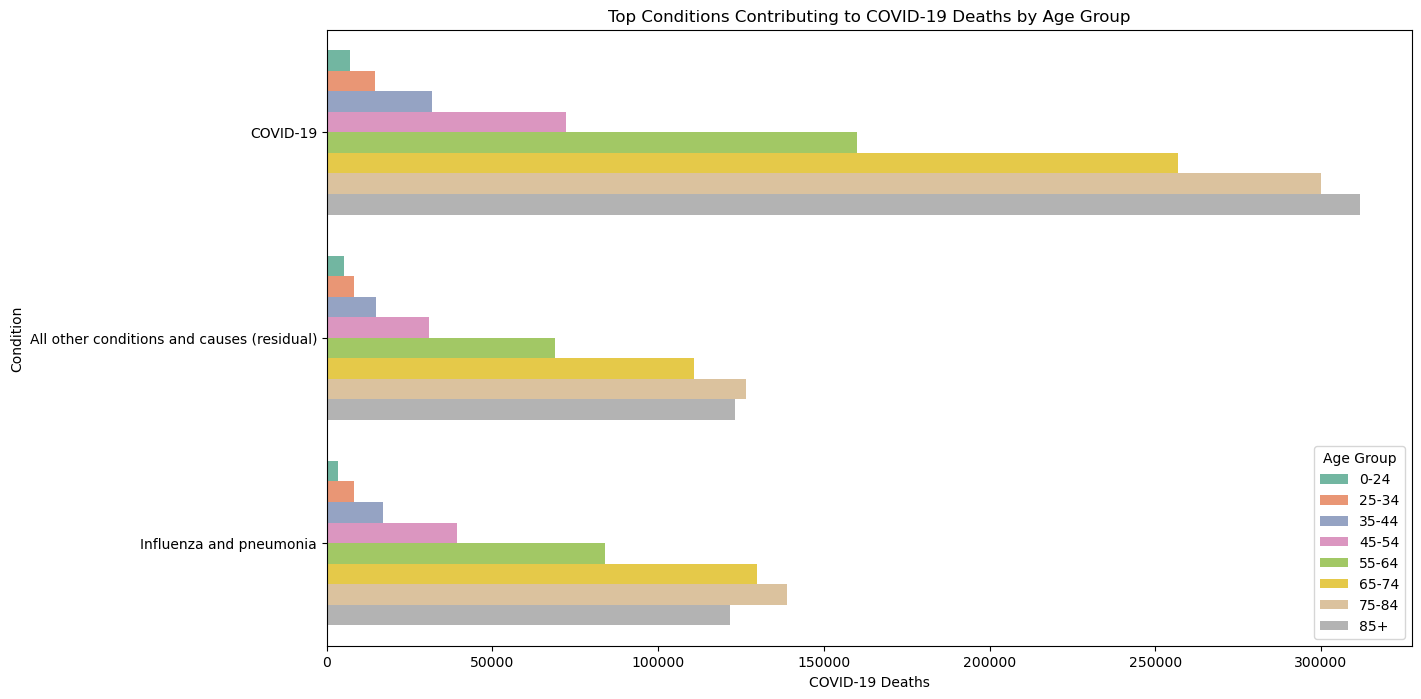

In [27]:
# Create a bar plot to visualize the most common conditions contributing to COVID-19 deaths in different age groups
plt.figure(figsize=(14, 8))
sns.barplot(x='COVID-19 Deaths', y='Condition', hue='Age Group', data=top_conditions_by_age_group, palette='Set2')
plt.title('Top Conditions Contributing to COVID-19 Deaths by Age Group')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Condition')
plt.legend(title='Age Group')
plt.show()

###  The condition labeled as COVID-19 has the highest number of deaths across all age groups. 

In [28]:
age_condition_deaths = df.groupby(['Age Group', 'Condition'])['COVID-19 Deaths'].sum().reset_index()


In [29]:
pivot_table = age_condition_deaths.pivot(index='Age Group', columns='Condition', values='COVID-19 Deaths')


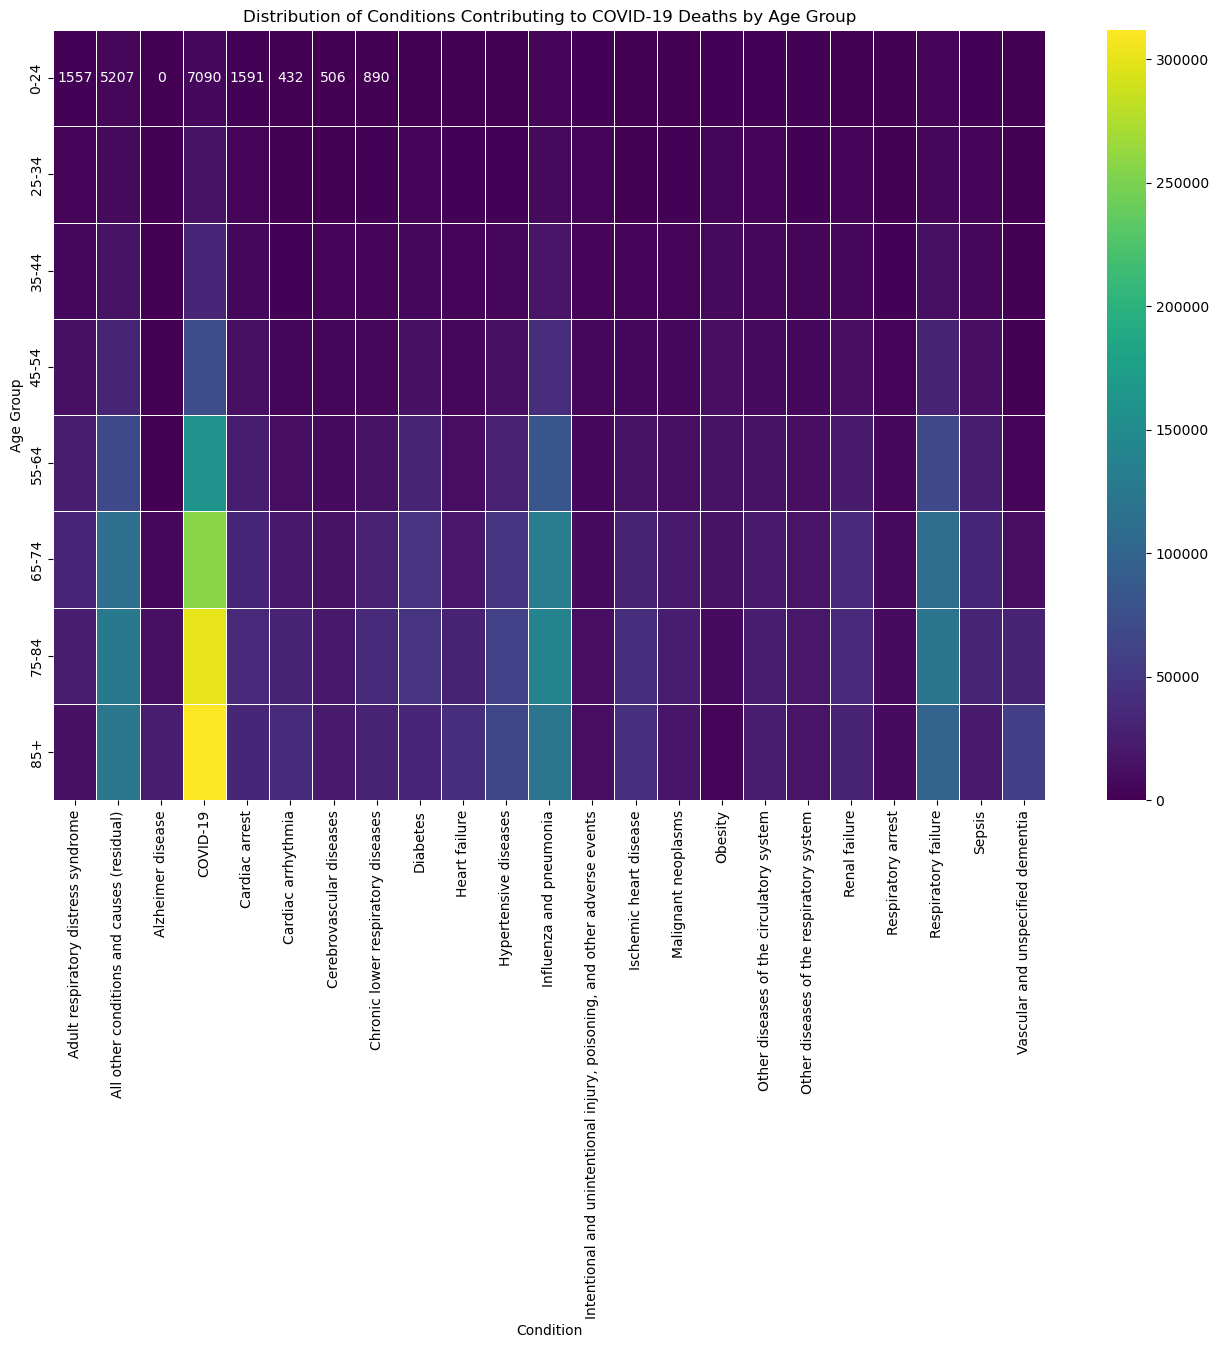

In [30]:
# Create a heatmap to visualize the distribution of conditions by age group
plt.figure(figsize=(16, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Distribution of Conditions Contributing to COVID-19 Deaths by Age Group')
plt.xlabel('Condition')
plt.ylabel('Age Group')
plt.xticks(rotation=90)
plt.show()

### The distribution of various conditions contributing to COVID-19 deaths across different age groups clearly shows that Covid-19 is the condition with the highest number of deaths across all age groups, especially in the older age groups. ' All other conditions and causes (residual)', 'Influenza and pneumonia', and 'Respiratory diseases' also show high death counts. 

In [31]:
state_deaths = df.groupby('State')['COVID-19 Deaths'].sum().reset_index()


In [32]:
state_deaths = state_deaths.sort_values(by='COVID-19 Deaths', ascending=False)


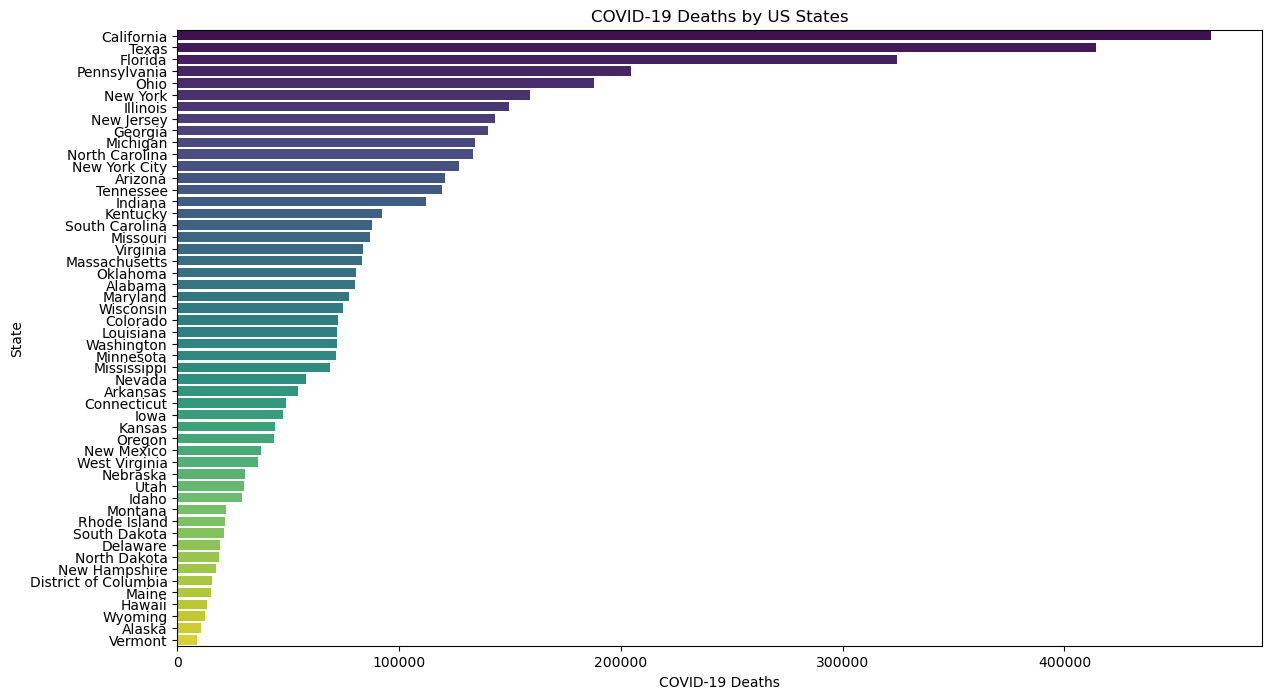

In [33]:
# Create a bar plot to visualize COVID-19 deaths by state
plt.figure(figsize=(14, 8))
sns.barplot(x='COVID-19 Deaths', y='State', data=state_deaths, palette='viridis')
plt.title('COVID-19 Deaths by US States')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('State')
plt.show()

### California, Texas, Pennsylvanis, Ohio, NewYork are the states which have the more COVID-19 deaths in compare to other states.

## Hypothesis and Key Questions

### Hypothesis:  "Individuals aged 65 and above are more likely to experience higher mortality rates due to COVID-19 compared to individuals below the age of 65."

###  1.  How does age affect the mortality rates associated with COVID-19?
###   Age is a significant factor influencing COVID-19 mortality rates. The data shows that individuals aged 65 and    above have significantly higher mortality rates compared to younger age groups

### 2. What are the most significant conditions contributing to COVID-19 deaths across different age groups?
###  The COVID-19, Respiratory Diseases and Circulatory Diseases are the most significant conditions contributing to COVID-19 deaths across different age groups

### 3. What are the key conditions that contribute to COVID-19 deaths in the oldest age groups (65+)?
###    The COVID-19, Respiratory Diseases and Circulatory Diseases  are the key conditions that contribute to COVID-19 deaths in the oldest age groups (65+).

### 4. How does the distribution of conditions contributing to COVID-19 deaths vary by age group?
###  The Younger Age Groups(0-24) have lower death counts across all conditions.The Middle Age Groups(25-54)have gradual increase in deaths, with conitions like respiratory diseases becoming more significant.  And The Older Age Groups(55+) have sharp increase in deaths, particularly from COVID-19, respiratory diseases, and circulatory diseases.

### 5. Which states have the highest and lowest prevalence of COVID-19 deaths?
###  California, Texas, Pennsylvanis, Ohio, NewYork are the states with the highest prevalence of COVID-19 deaths.
###  Wyoming, Vermont, and Alaska are the states with the lowest prevalence of COVID-19 deaths.